Step 1 − First, we need to specify the number of clusters, K, need to be generated by this algorithm.

Step 2 − Next, randomly select K data points and assign each data point to a cluster. In simple words, classify the data based on the number of data points.

Step 3 − Now it will compute the cluster centroids.

Step 4 − Next, keep iterating the following until we find optimal centroid which is the assignment of data points to the clusters that are not changing any more −

# Get Dataset
We will generate a random dataset with two features (columns) and four centers (number of class labels or clusters) using the make_blobs function available in the sklearn package.

In [2]:
from sklearn.datasets import make_blobs
import pandas as pd

dataset, classes = make_blobs(n_samples=200, n_features=2, centers=4, cluster_std=0.5, random_state=0)
# make as panda dataframe for easy understanding
df = pd.DataFrame(dataset, columns=['var1', 'var2'])
df

,var1,var2
0,2.204387,1.560857
1,-1.133740,2.684673
2,1.064983,4.102897
3,-2.376038,7.324207
4,1.682890,0.484444
...,...,...
195,-1.853108,2.722406
196,-1.313775,3.256336
197,0.999149,4.210195
198,-1.110998,7.390002


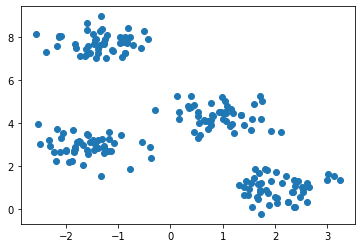

In [8]:
import matplotlib.pyplot as plt
plt.scatter(df['var1'],df['var2'])

# Compute k
we have to use methods such as Elbow or Silhouette methods for finding the optimal number of clusters in the dataset. Here, I will use the Elbow method to find the optimal number of clusters.

In [4]:
!pip install yellowbrick

     -------------------------------------- 282.6/282.6 kB 1.9 MB/s eta 0:00:00


C:\Users\Deepayan\anaconda3\envs\tf-gpu\lib\site-packages\sklearn\cluster\_kmeans.py:1036: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


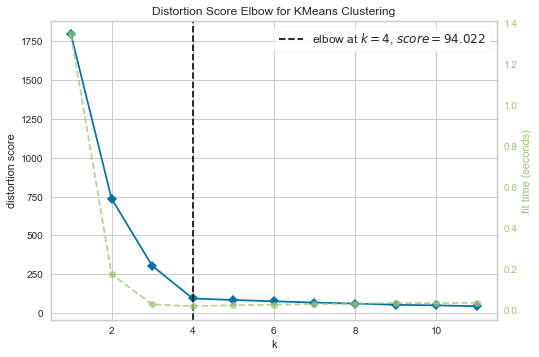

<AxesSubplot:title={'center':'Distortion Score Elbow for KMeans Clustering'}, xlabel='k', ylabel='distortion score'>

In [6]:
from yellowbrick.cluster import KElbowVisualizer
from sklearn.cluster import KMeans
model = KMeans()
visualizer = KElbowVisualizer(model, k=(1,12)).fit(df)
visualizer.show()

In [7]:
from sklearn.cluster import KMeans
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0).fit(df)

#‘k-means++’ : selects initial cluster centroids using sampling based on an empirical 
#probability distribution of the points’ contribution to the overall inertia. 
#This technique speeds up convergence, and is theoretically proven to be O(logk)-optimal. 


# Visualization of k-means clustering


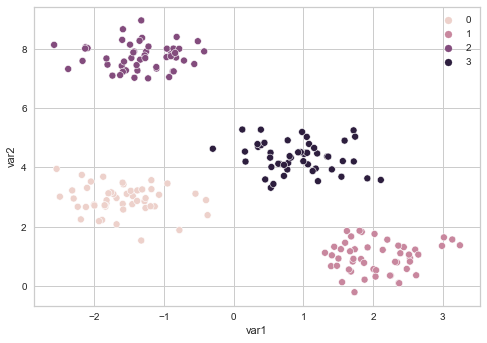

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.show()

# Plot k-means clustering plot with centroids,

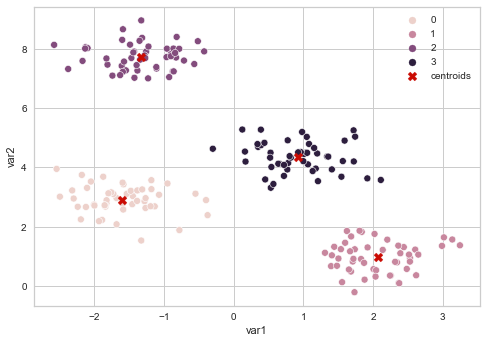

In [9]:
sns.scatterplot(data=df, x="var1", y="var2", hue=kmeans.labels_)
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], 
            marker="X", c="r", s=80, label="centroids")
plt.legend()
plt.show()